In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from skimage.metrics import structural_similarity, peak_signal_noise_ratio
from logging_utils import *

In [2]:
import sys
sys.path.append("/home/kelvinfung/Documents/live-predator/")
from data.data_classes import *
from models import *

In [3]:
batch_size = 2
num_ctx_frames = 5
num_tgt_frames = 5
data_path = Path("../data/samples_1_aug_160_280/combined.npy")

liveness_datamodule = LivenessDataModule(batch_size, 
                                         num_ctx_frames, 
                                         num_tgt_frames, 
                                         data_path)
liveness_datamodule.setup()

test_dataloader = liveness_datamodule.test_dataloader()
for test_x_batch, test_y_batch in test_dataloader:
    break

test_y_batch.shape  # bs x C x F x H x W

torch.Size([2, 3, 5, 280, 160])

In [4]:
hid_s=16
hid_t=256
N_s=4
N_t=8
kernel_sizes=[3,5,7,11]
groups=8

channels = 3
height = 280
width = 160
input_shape = (channels, num_ctx_frames, height, width)

model = SimVP(input_shape, hid_s=16, hid_t=256, N_s=4, N_t=8,
                 kernel_sizes=[3,5,7,11], groups=8,
                 learning_rate=1e-3)

In [5]:
pred_y_batch = model.forward(test_x_batch)
pred_y_batch.shape

torch.Size([2, 3, 5, 280, 160])

(array([ 5681., 12924.,  7181.,  2709.,  1683.,  1401.,  1796.,  2165.,
         2563.,  6697.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

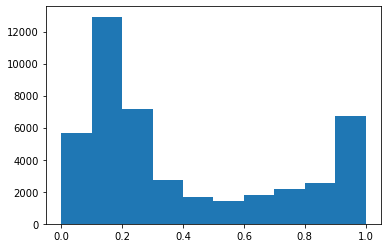

In [6]:
plt.hist(test_y_batch[0, 0, 0].detach().numpy().flatten())

(array([   71.,   407.,   905.,  2666., 13421., 15155.,  5748.,  4177.,
         1950.,   300.]),
 array([0.19167824, 0.25012812, 0.308578  , 0.3670279 , 0.4254778 ,
        0.4839277 , 0.5423776 , 0.6008275 , 0.6592774 , 0.7177273 ,
        0.77617717], dtype=float32),
 <BarContainer object of 10 artists>)

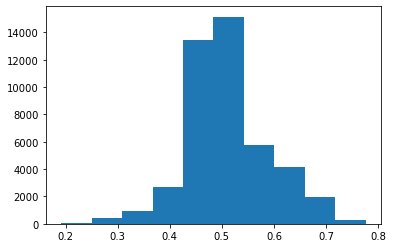

In [7]:
plt.hist(pred_y_batch[0, 0, 0].detach().numpy().flatten())

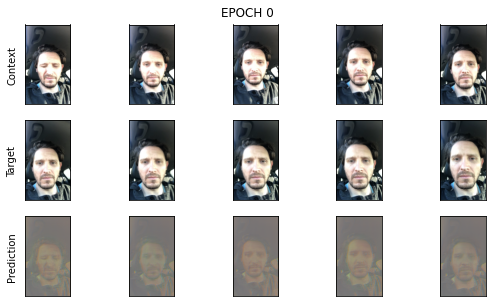

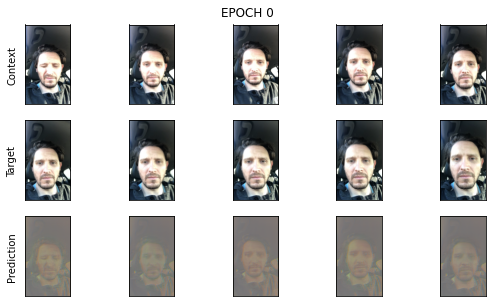

In [11]:
make_plot(test_x_batch[0], test_y_batch[0], pred_y_batch[0].detach(), 0)